# Thejo Thanvitha Majety
# AP19110010040
# CSE-D

## Problem Statement:
Stroke is a leading cause of death across the world and a major cause of severe disability in adults. The sudden death of living brain cells due to loss of blood flow or lack of oxygen flow to brain is almost fatal.

So, here I am using the stroke prediction dataset here contains data like age, average glucose level in body, whether or not they had a heart disease or hypertension, etc of patients.The data is split into training and test data and the training data is used to create models that predict whether or not an entry from the test data will suffer a stroke.


## Importing the required libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print('Shape of dataframe:',df.shape)

Shape of dataframe: (5110, 12)


## Data Cleaning and Preprocessing

* Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset and it is the process of preparing raw data for analysis by removing bad data, organizing the raw data, and filling in the null values
* Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying data mining algorithms.

## Checking for null values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#Only the bmi column has missing data so we need to fill it.
#1. Creating a function to classify bmi values into different groups.
#2. Based on the classification we will create box plots.
#3. Based on the averages obtained through box plots we will fill the average value

def bmi_values(bmi_values):
    if bmi_values<20:
        return 'undernourished'
    elif 20<=bmi_values<30:
        return 'normal_weight_1'
    elif 30<=bmi_values<40:
        return 'overweight'
    elif 40<=bmi_values<50:
        return 'Obese I'
    elif 50<=bmi_values<70:
        return 'Obese II'
    elif 70<=bmi_values<100:
        return 'Obese III'
    else:
        pass
df['bmi_classification']=df['bmi'].apply(bmi_values)

bmi_classification  stroke
Obese I             0          317
                    1           18
Obese II            0           74
                    1            1
Obese III           0            4
normal_weight_1     0         2361
                    1          108
overweight          0         1427
                    1           79
undernourished      0          517
                    1            3
Name: stroke, dtype: int64


Text(0.5, 1.0, 'BMI classes')

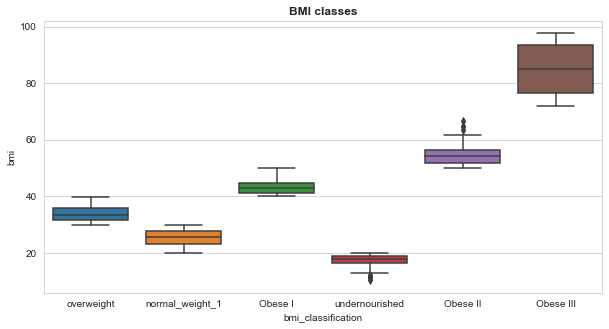

In [6]:
print(df.groupby('bmi_classification').stroke.value_counts())
plt.figure(figsize=(10,5)) 
sns.set_style('whitegrid')
sns.boxplot(x='bmi_classification',y='bmi',data=df)
plt.title('BMI classes',fontweight='bold',fontsize=12)

In [7]:
#Filling in values based on the results obatined from the box plot.
def bmi_fill(bmi_value):
    if pd.isnull(bmi_value):   
        if bmi_value<=20:
            return 17
        elif 20<bmi_value<=30:
            return 26
        elif 30<bmi_value<=40:
            return 33
        elif 40<bmi_value<=50:
            return 43
        elif 50<bmi_value<=70:
            return 55
        elif 70<bmi_value<=100:
            return 63
        else:
            return 105
    else:
        return bmi_value 
    
df['bmi']=df['bmi'].apply(bmi_fill)

In [8]:
df['bmi'].isnull().sum()

0

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,31.886869,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,16.678613,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,34.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,105.000000,1.000000


## Plotting a heatmap to find correlations between the variables

<AxesSubplot:>

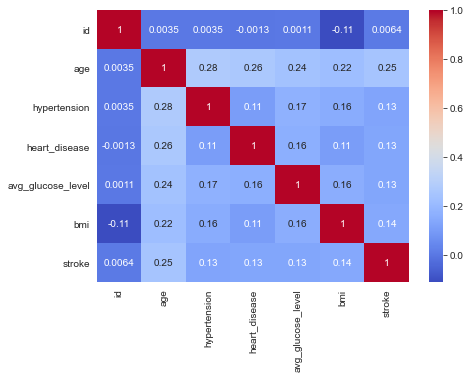

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## Statistical Analysis of the Data

**Gender and chances of stroke**

               stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1


Text(0.5, 1.0, 'Gender wise stroke count')

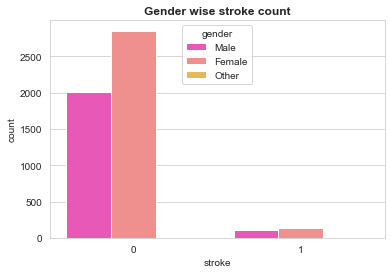

In [11]:
print(df.groupby('gender').stroke.value_counts().to_frame())
sns.set_style('whitegrid')
sns.countplot(x='stroke',data=df,hue='gender',palette='spring')
plt.title('Gender wise stroke count',fontweight='bold')

**Relation between gender and hypertension**

gender  hypertension
Female  0               2718
        1                276
Male    0               1893
        1                222
Other   0                  1
Name: hypertension, dtype: int64


Text(0.5, 1.0, 'Gender wise hypertension count')

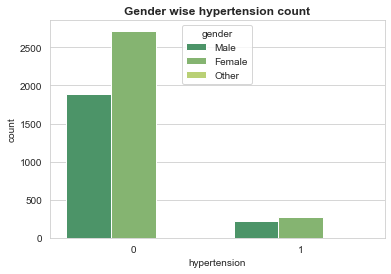

In [12]:
print(df.groupby('gender').hypertension.value_counts())
sns.countplot(x='hypertension',data=df,hue='gender',palette='summer')
plt.title('Gender wise hypertension count',fontweight='bold')

**Relation between gender and heart disease**

gender  heart_disease
Female  0                2881
        1                 113
Male    0                1952
        1                 163
Other   0                   1
Name: heart_disease, dtype: int64


Text(0.5, 1.0, 'Gender wise heart disease count')

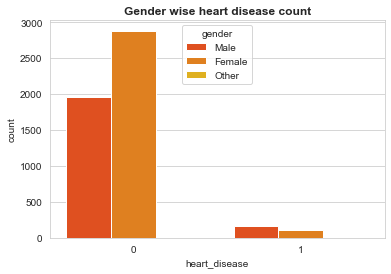

In [13]:
print(df.groupby('gender').heart_disease.value_counts())
sns.countplot(x='heart_disease',data=df,hue='gender',palette='autumn')
plt.title('Gender wise heart disease count',fontweight='bold')

**Relation between gender and heart disease**

stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

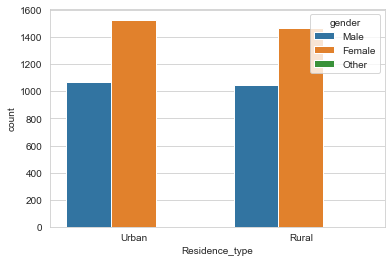

In [14]:
print(df.groupby('stroke').Residence_type.value_counts())
sns.countplot(x='Residence_type',data=df,hue='gender')

In [15]:
#Finding the relation between stroke, gender and their average glucose level
def glucose_level(amount):
    if amount<60:
        return 'Dangerously low'
    elif 60<=amount<90:
        return 'Low'
    elif 90<=amount<110:
        return 'Normal'
    elif 110<=amount<140:
        return 'Slightly high'
    elif 140<=amount<240:
        return 'High'
    elif 240<=amount<300:
        return 'Extremely high'
    else:
        return 'Dangerously high, requires medical attention'
df['Glucose_level_chart']=df['avg_glucose_level'].apply(glucose_level)

**Relation between age and chances of stroke**

Total number of people who suffered a stroke: 249


<AxesSubplot:title={'center':'Age distribution of people who suffered a stroke'}, xlabel='Age', ylabel='Density'>

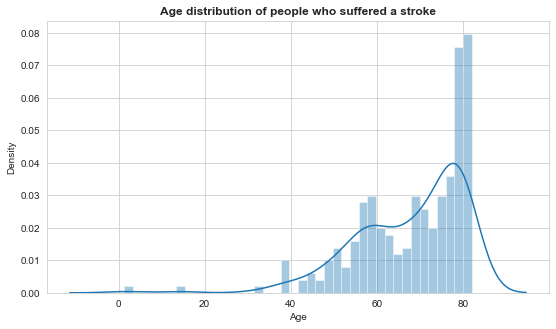

In [16]:
list_stroke=[]
for i in df['age'].index:
    if (df['stroke'][i]==1):
        list_stroke.append(df['age'][i])
print('Total number of people who suffered a stroke:', len(list_stroke))
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
plt.title('Age distribution of people who suffered a stroke',fontweight='bold',fontsize=12)
plt.xlabel('Age')
sns.distplot(list_stroke,bins=40)

**Work type and stroke analysis**

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'Work type and stroke'}, xlabel='work_type', ylabel='count'>

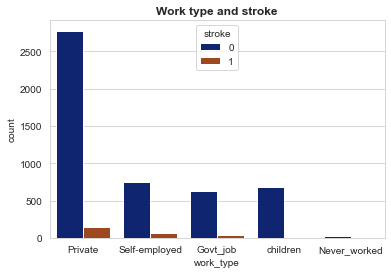

In [17]:
print(df.groupby('work_type').stroke.value_counts())
plt.figure(figsize=(6,4))
plt.title('Work type and stroke',fontweight='bold')
plt.xlabel('Work')
sns.countplot(x='work_type',data=df,hue='stroke',palette='dark')

**Relation between smoking status and stroke**

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'Smoking status analysis'}, xlabel='smoking_status', ylabel='count'>

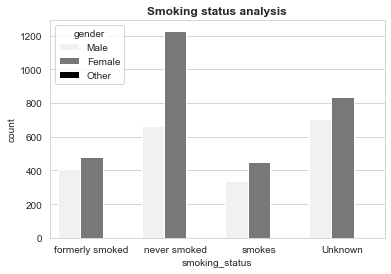

In [18]:
print(df.groupby('smoking_status').stroke.value_counts())
plt.title('Smoking status analysis',fontweight='bold')
plt.xlabel('Smoking status')
sns.countplot(x='smoking_status',data=df,hue='gender',color='black')

**Getting dummies for categorical column**

In [19]:
Gender =pd.get_dummies(df['gender'],drop_first=True)   
#Getting dummies for categorical column -'gender' (that has strings)
df=pd.concat([df,Gender],axis=1)

## Dropping the columns that are not required for training the model.

In [20]:
#Now there are no missing values in the bmi column.
df.drop(['id','bmi_classification','work_type','ever_married','Residence_type',
         'smoking_status','Glucose_level_chart','gender'],axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other
0,67.0,0,1,228.69,36.6,1,1,0
1,61.0,0,0,202.21,105.0,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0
3,49.0,0,0,171.23,34.4,1,0,0
4,79.0,1,0,174.12,24.0,1,0,0


## Creating model and making predictions

### Decision Tree

In [21]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier

In [23]:
lm=DecisionTreeClassifier()

In [24]:
lm.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
lm_predictions=lm.predict(X_test)

In [26]:
lm.score(X_test,y_test)*100 

90.73711676451403

## Conclusion
The decision tree is the best predictive model as it allows for a comprehensive analysis of the consequences of each possible decision, such as what the decision leads to, whether it ends in uncertainty or a definite conclusion and after creating and training my model I achieved an accuracy score of 90.1%